### Read in and plot the data.

In [63]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from random import sample

In [243]:
## WORKING ##

class NormalRegCoeffs():
    def __init__(self, plot, df):
        
        self.plot = plot
        
        self.m = df.shape[0]
        self.X = df[0].to_numpy().reshape(self.m,1)
        self.y = df[1].to_numpy().reshape(self.m,1)
        
    def predict(self, X, w):
        return X.dot(w)
        
    def get_coeff_norm(self, X, y):
        a,b = X.T.dot(X), X.T.dot(y)
        return np.linalg.inv(a).dot(b)
        
    def main(self):
        self.bias_X = np.append(self.X, np.ones((self.m,1)), axis=1)
        
        w = self.get_coeff_norm(self.bias_X, self.y)
        
        p = norms.predict(self.bias_X, w)
        
        print(' \nLinear model: y = w0 + w1*x', 
          f'\nPredicted regression coefficients: {w[0].item():.4}, {w[1].item():.4}\n')
        
        if self.plot:
            scatter_plot(self.X, self.y)
            plotData(self.X, self.y, p)

In [239]:
def plotData(X,y,p):
    fig,ax = plt.subplots()
    ax.scatter(X, y)
    ax.plot(X, p, 'r')
    ax.set(title='Training Data and Predicted Values, Normal Eq.', 
           xlabel = 'Training Input', ylabel = 'Target/Predicted')

In [240]:
def scatter_plot(X,y):
    # create figure and plot
    fig, ax = plt.subplots()
    ax.scatter(X,y)

    # clean up fig attributes
    ax.set(xlim=(4, 25),ylim=(-5, 25))
    ax.grid(True)
    ax.set_title('Raw data, x vs. y ')

    return plt.show()

In [241]:
filepath = 'data2.txt'

 
Linear model: y = w0 + w1*x 
Predicted regression coefficients: 1.193, -3.896



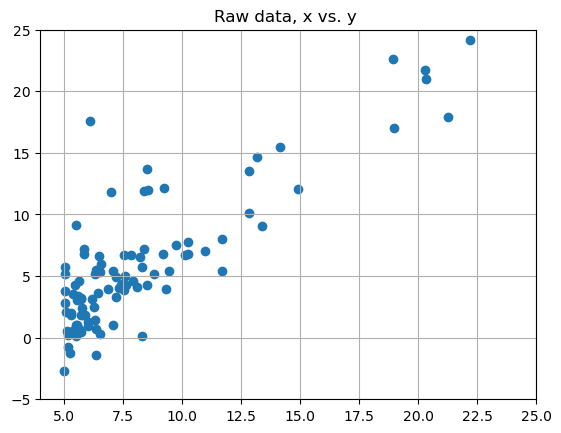

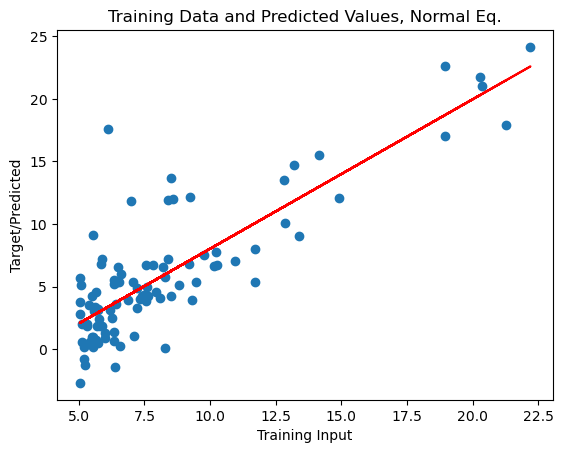

In [244]:
plot = True
df = pd.read_csv(filepath, header = None, delimiter = ",")

norms = NormalRegCoeffs(plot, df)
coeffs = norms.main()

In [65]:
mode = ["batch", "stochastic"]

## Base

In [250]:
class LinGD():
    def __init__(self):
        self.learning_rate = 1e-10
        self.epochs = 10000
        
    def yhat(self, X, w):
        return np.dot(w.T, X)
    
    def loss(self, yhat, y):
        L = 1/self.m * np.sum(np.power(yhat - y, 2))
        return L
        
    def gradient_descent(self, w, X, y, yhat):
        dldw = 2/self.m * np.dot(X, (yhat-y).T)
        w = w - self.learning_rate*dldw
        return w
        
    def main(self,X,y):
        x1 = np.ones((1, X.shape[1]))
        X = np.append(X, x1, axis=0)
        
        self.m = X.shape[1]
        self.n = X.shape[0]
        
        w = np.zeros((self.n, 1))
        
        for epoch in range(self.epochs+1):
            yhat = self.yhat(X,w)
            loss = self.loss(yhat, y)
            
            if epoch % 2000 == 0:
                print(f'cost at epoch {epoch} is {loss:.8}')
                
            w = self.gradient_descent(w, X, y, yhat)
            
        return w

In [251]:
Xg = np.random.rand(1,500)
yg = 3*Xg + np.random.randn(1,500)*0.1
reg = LinGD()
eg = reg.main(Xg,yg)

cost at epoch 0 is 3.0738406
cost at epoch 2000 is 3.0738379
cost at epoch 4000 is 3.0738352
cost at epoch 6000 is 3.0738325
cost at epoch 8000 is 3.0738298
cost at epoch 10000 is 3.0738271


In [246]:
class GradientDescent():
    def __init__(self, df):
        
        self.learning_rate = 1e-10
        self.epochs = 1000
        self.tol = 1e-4
        
        self.m = df.shape[0]
        self.X = df[0].to_numpy().reshape(self.m,1)
        self.y = df[1].to_numpy().reshape(self.m,1)
        
    def prediction(self, X, w):
        return np.dot(w.T, X)

    def MSE(self, error,m):
        return 1/m*(error**2).sum()

    def descent(self, w, X, error,N):
        dfdw = 2/N*X.dot(error.T)
        # return negative gradient direction scaled by learning rate
        return -learn*dfdw
    
    def get_coeff_BGD(self, X, y,m, N, start,X_test,y_test):
    
        # X = np.append(X, np.ones((1, m)), axis = 0)
        X_test = np.append(X_test, np.ones((1, m_test)), axis = 0)

        train_error = {}
        test_error = {}

        # initialize w vector as a random guess
        w = start

        for i in range(epochs+1):
            # calculate test/train error and store in dicts
            p_test = prediction(X_test, w)
            t_error = p_test - y_test

            p = self.prediction(X,w)
            error = p-y

            train_error[i] = self.MSE(error,m)
            test_error[i] = self.MSE(t_error,m)

            # find step size and adjust w vector
            delta = self.descent(w,X,error,N)

            # if rate of change is less than or eq to tolerance, end
            if np.all(np.abs(delta) <= tol):
                break

            w = w + delta
        return test_error, train_error, w, p 
    
    def main(self):
        mse_test_b = {}
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.2)
        m_test, m_train = len(X_test), len(X_train)

        X_train, y_train = X_train.reshape(m_train,1), y_train.reshape(m_train,1)
        X_test, y_test = X_test.reshape(1,m_test), y_test.reshape(1,m_test)
        start = np.random.randn(2,1)
        
        b_test, b_train, batch , pred_b = self.get_coeff_BGD(self.X, self.y, self.m, 1, start,X_test,y_test)
        mse_error = np.mean(list(b_test.values()))/m_test
        mse_test_b[learn] = mse_error

        plt.plot(b_train.keys(), b_train.values(), label = 'train')
        plt.plot(b_test.keys(), b_test.values(), label = 'test')
        plt.title(f'MSE vs. Iteration, Batch GD, learn rate = {learn}')
        plt.legend()
        plt.show()
    
    
        
        

In [247]:
GD = GradientDescent(df)
GD.main()


ValueError: shapes (1,2) and (97,1) not aligned: 2 (dim 1) != 97 (dim 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

m_test, m_train = len(X_test), len(X_train)

X_train, y_train = X_train.reshape(1,m_train), y_train.reshape(1,m_train)
X_test, y_test = X_test.reshape(1,m_test), y_test.reshape(1,m_test)

rates = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
tol = 1e-4
epochs = 1000
start = np.random.randn(2,1)

mse_test_s = {}

for learn in rates:
    ## stochastic GD
    s_test,s_train, stochastic, pred_s = get_coeff_SGD(X_train, y_train, m_train, 1, 
                                                       start, X_test, y_test)
    
    mse_error = np.mean(list(s_test.values()))/m_test
    mse_test_s[learn] = mse_error
    
    plt.plot(s_train.keys(), s_train.values(), label = 'train')
    plt.plot(s_test.keys(), s_test.values(), label = 'test')
    plt.title(f'MSE vs. Iteration, Stochastic GD, learn rate = {learn}')
    plt.legend()
    plt.show()
    
plt.plot(mse_test_s.keys(),mse_test_s.values())   
plt.title(f'MSE vs. Learning Rate, Stochastic GD')
plt.show()

In [ ]:
# intialize arrays for dataset as well as test/train set
X, y = df[0].to_numpy(), df[1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

m_test, m_train = len(X_test), len(X_train)

X_train, y_train = X_train.reshape(1,m_train), y_train.reshape(1,m_train)
X_test, y_test = X_test.reshape(1,m_test), y_test.reshape(1,m_test)

In [ ]:
def prediction(X,w):
    return np.dot(w.T, X)

def MSE(error,m):
    return 1/m*(error**2).sum()

def descent(w, X, error,N):
    dfdw = 2/N*X.dot(error.T)
    # return negative gradient direction scaled by learning rate
    return -learn*dfdw

def get_coeff_BGD(X, y,m,N, start,X_test,y_test):
    
    X = np.append(X, np.ones((1, m)), axis = 0)
    X_test = np.append(X_test, np.ones((1, m_test)), axis = 0)
    
    train_error = {}
    test_error = {}
    
    # initialize w vector as a random guess
    w = start
    
    for i in range(epochs+1):
        # calculate test/train error and store in dicts
        p_test = prediction(testing, w)
        t_error = p_test - y_test
        
        p = prediction(X,w)
        error = p-y
        
        train_error[i] = MSE(error,m)
        test_error[i] = MSE(t_error,m)
        
        # find step size and adjust w vector
        delta = descent(w,X,error,N)
        
        # if rate of change is less than or eq to tolerance, end
        if np.all(np.abs(delta) <= tol):
            break
            
        w = w + delta
    return test_error, train_error, w, p 

def get_coeff_SGD(X,y,m,N,start,X_test,y_test):
    X = np.append(X, np.ones((1, m)), axis = 0)
    X_test = np.append(X_test, np.ones((1, m_test)), axis = 0)
    
    train_error = {}
    test_error = {}
    
    # initialize w vector as a random guess
    w = start
    
    for i in range(epochs+1):
        p_test = prediction(testing, w)
        t_error = p_test - y_test
        p = prediction(X,w)
        error = p-y
        
        train_error[i] = MSE(error,m)
        test_error[i] = MSE(t_error,m)
        
        pt = sample(list(range(m)),1)[0]
        dfdw = 2*np.dot(X[0][pt],error.T[pt])
        delta = -learn*dfdw
        
        if np.all(np.abs(delta) <= tol):
            break
            
        w = w + delta
        
    return test_error, train_error, w, p 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

m_test, m_train = len(X_test), len(X_train)

X_train, y_train = X_train.reshape(1,m_train), y_train.reshape(1,m_train)
X_test, y_test = X_test.reshape(1,m_test), y_test.reshape(1,m_test)

rates = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
tol = 1e-4
epochs = 1000
start = np.random.randn(2,1)

mse_test_s = {}

for learn in rates:
    ## stochastic GD
    s_test,s_train, stochastic, pred_s = get_coeff_SGD(X_train, y_train, m_train, 1, 
                                                       start, X_test, y_test)
    
    mse_error = np.mean(list(s_test.values()))/m_test
    mse_test_s[learn] = mse_error
    
    plt.plot(s_train.keys(), s_train.values(), label = 'train')
    plt.plot(s_test.keys(), s_test.values(), label = 'test')
    plt.title(f'MSE vs. Iteration, Stochastic GD, learn rate = {learn}')
    plt.legend()
    plt.show()
    
plt.plot(mse_test_s.keys(),mse_test_s.values())   
plt.title(f'MSE vs. Learning Rate, Stochastic GD')
plt.show()

### 3.2) Use the Normal Equation to find the linear regression coefficients.

### 3.3) Use Batch and Stochastic Gradient Descent to find the regression coefficients.

In [128]:
# intialize arrays for dataset as well as test/train set
X, y = df[0].to_numpy(), df[1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

m_test, m_train = len(X_test), len(X_train)

X_train, y_train = X_train.reshape(1,m_train), y_train.reshape(1,m_train)
X_test, y_test = X_test.reshape(1,m_test), y_test.reshape(1,m_test)

In [129]:
def prediction(X,w):
    return np.dot(w.T, X)

def MSE(error,m):
    return 1/m*(error**2).sum()

def descent(w, X, error,N):
    dfdw = 2/N*X.dot(error.T)
    # return negative gradient direction scaled by learning rate
    return -learn*dfdw

def get_coeff_BGD(X, y,m,N, start,X_test,y_test):
    
    X = np.append(X, np.ones((1, m)), axis = 0)
    X_test = np.append(X_test, np.ones((1, m_test)), axis = 0)
    
    train_error = {}
    test_error = {}
    
    # initialize w vector as a random guess
    w = start
    
    for i in range(epochs+1):
        # calculate test/train error and store in dicts
        p_test = prediction(testing, w)
        t_error = p_test - y_test
        
        p = prediction(X,w)
        error = p-y
        
        train_error[i] = MSE(error,m)
        test_error[i] = MSE(t_error,m)
        
        # find step size and adjust w vector
        delta = descent(w,X,error,N)
        
        # if rate of change is less than or eq to tolerance, end
        if np.all(np.abs(delta) <= tol):
            break
            
        w = w + delta
    return test_error, train_error, w, p 

def get_coeff_SGD(X,y,m,N,start,X_test,y_test):
    X = np.append(X, np.ones((1, m)), axis = 0)
    X_test = np.append(X_test, np.ones((1, m_test)), axis = 0)
    
    train_error = {}
    test_error = {}
    
    # initialize w vector as a random guess
    w = start
    
    for i in range(epochs+1):
        p_test = prediction(testing, w)
        t_error = p_test - y_test
        p = prediction(X,w)
        error = p-y
        
        train_error[i] = MSE(error,m)
        test_error[i] = MSE(t_error,m)
        
        pt = sample(list(range(m)),1)[0]
        dfdw = 2*np.dot(X[0][pt],error.T[pt])
        delta = -learn*dfdw
        
        if np.all(np.abs(delta) <= tol):
            break
            
        w = w + delta
        
    return test_error, train_error, w, p 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

m_test, m_train = len(X_test), len(X_train)

X_train, y_train = X_train.reshape(1,m_train), y_train.reshape(1,m_train)
X_test, y_test = X_test.reshape(1,m_test), y_test.reshape(1,m_test)

rates = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
tol = 1e-4
epochs = 1000
start = np.random.randn(2,1)

mse_test_s = {}

for learn in rates:
    ## stochastic GD
    s_test,s_train, stochastic, pred_s = get_coeff_SGD(X_train, y_train, m_train, 1, 
                                                       start, X_test, y_test)
    
    mse_error = np.mean(list(s_test.values()))/m_test
    mse_test_s[learn] = mse_error
    
    plt.plot(s_train.keys(), s_train.values(), label = 'train')
    plt.plot(s_test.keys(), s_test.values(), label = 'test')
    plt.title(f'MSE vs. Iteration, Stochastic GD, learn rate = {learn}')
    plt.legend()
    plt.show()
    
plt.plot(mse_test_s.keys(),mse_test_s.values())   
plt.title(f'MSE vs. Learning Rate, Stochastic GD')
plt.show()

NameError: name 'testing' is not defined

In [126]:
mse_test_b = {}

for learn in rates:
    ## Batch GD
    b_test, b_train, batch , pred_b = get_coeff_BGD(X_train, y_train, m_train, m_train, 
                                                    start,X_test,y_test)
    
    mse_error = np.mean(list(b_test.values()))/m_test
    mse_test_b[learn] = mse_error
    
    plt.plot(b_train.keys(), b_train.values(), label = 'train')
    plt.plot(b_test.keys(), b_test.values(), label = 'test')
    plt.title(f'MSE vs. Iteration, Batch GD, learn rate = {learn}')
    plt.legend()
    plt.show()
    
plt.plot(mse_test_b.keys(),mse_test_b.values())   
plt.title(f'MSE vs. Learning Rate, Batch GD')
plt.show()

NameError: name 'rates' is not defined

# Best learning rate
Based on MSE and convergence, the best learning rate for Batch GD is 0.0001 to 0.002 and the best for Stochastic GD is 0.0001 to 0.004. Overall, SGD was able to perform better at higher learning rates than BGD, but BGD sometimes converged faster at very low learning rates.

# Accuracy on the test set

Batch GD was more accurate overall, since it considers every gradient and takes the steepest route. Stochastic GD is only using one point for estimations at each iteration, so it jumps around more in terms of error. This can be seen in the noisiness of the graphs of MSE vs iterations for stochastic GD compared to the smoother curves of batch GD.

# Speed of convergence

SGD converged faster than BGD. This is due to it randomly sampling points to take the gradient, so it can update the weights quickly and can take larger steps towards the optimal point. Since a tolerance was used as a stopping condition, in most cases SGD was able to reach values within an acceptable range faster than BGD. This makes it preferable for large datasets, or when a good estimate of the optimum value is acceptable; the reduction in accuracy can be ok since it converges faster.